In [6]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#open data
data = xr.open_dataset('C://Users//frida//OneDrive//Dokument//Klimatdatatillampningar//Project//ERA5_2//ERA5.hourly.1981-2021.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 4, latitude: 4, time: 268872)
Coordinates:
  * longitude  (longitude) float32 13.88 14.13 14.38 14.63
  * latitude   (latitude) float32 56.04 55.79 55.54 55.29
  * time       (time) datetime64[ns] 1981-01-01 ... 2021-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-14 12:13:31 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
#define a threshold for chill hours
chill_upper = 7.2 + 273.15
chill_lower = 273.15

In [5]:
#select data for the specific months (December, January, February, March) and calculate chill hours
selected_data = data.sel(time=data['time.month'].isin([12, 1, 2, 3]))
chill_hours = (selected_data['t2m'] >= chill_lower) & (selected_data['t2m'] <= chill_upper)
chill_hours

#count the number of True values (chill hours) for each year
annual_chill_hours_count = chill_hours.groupby('time.year').sum(dim='time')
annual_chill_hours_count

<xarray.DataArray 't2m' (year: 41, latitude: 4, longitude: 4)>
array([[[1082, 1163, 1268, 1497],
        [1163, 1317, 1593, 1794],
        [1307, 1477, 1757, 1877],
        [1750, 1876, 1911, 1955]],

       [[1393, 1488, 1635, 1815],
        [1481, 1662, 1883, 2039],
        [1660, 1808, 1988, 2058],
        [1995, 2022, 2032, 2054]],

       [[1721, 1798, 1937, 2131],
        [1810, 1977, 2234, 2397],
        [1966, 2167, 2424, 2531],
        [2446, 2566, 2590, 2634]],

       [[1581, 1690, 1844, 2101],
        [1701, 1886, 2203, 2373],
        [1889, 2138, 2362, 2472],
        [2347, 2425, 2476, 2514]],

...

       [[1614, 1730, 1881, 2099],
        [1708, 1915, 2191, 2337],
        [1898, 2100, 2325, 2387],
        [2324, 2379, 2389, 2396]],

       [[2076, 2136, 2237, 2440],
        [2165, 2297, 2528, 2658],
        [2288, 2487, 2647, 2635],
        [2616, 2622, 2637, 2634]],

       [[2444, 2479, 2521, 2651],
        [2510, 2560, 2633, 2591],
        [2535, 2630, 2636, 2624],
        [2657, 2638, 2650, 2654]],

       [[1443, 1604, 1755, 2020],
        [1596, 1832, 2117, 2327],
        [1807, 2033, 2323, 2442],
        [2331, 2443, 2474, 2510]]])
Coordinates:
  * longitude  (longitude) float32 13.88 14.13 14.38 14.63
  * latitude   (latitude) float32 56.04 55.79 55.54 55.29
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2018 2019 2020 2021

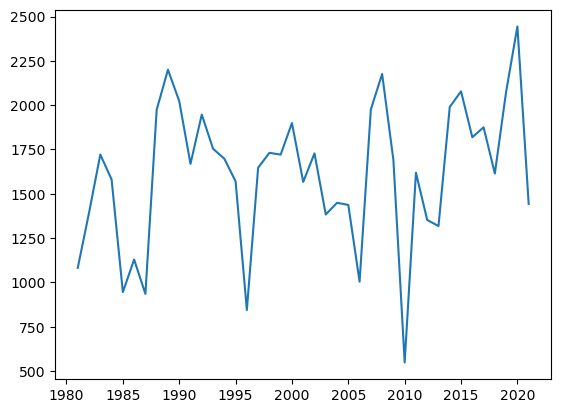

In [9]:
#plt.plot(annual_chill_hours_count)
plt.plot(annual_chill_hours_count['year'], annual_chill_hours_count[:, 0, 0])